# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Hasil_Clustering.csv')
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2B,Apollinaris,Juices,1.66,53.0,0.10,79.18,Baden-Württemberg,2
1,B2B,Apollinaris,Juices,0.87,35.0,0.10,27.40,Baden-Württemberg,2
2,B2B,Apollinaris,Alcoholic Beverages,2.14,44.0,0.10,84.74,Baden-Württemberg,2
3,B2B,Apollinaris,Juices,0.43,13.0,0.05,5.31,Baden-Württemberg,1
4,B2B,Apollinaris,Juices,1.38,3.0,0.05,3.93,Baden-Württemberg,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  38312 non-null  object 
 1   Product        38312 non-null  object 
 2   Category       38312 non-null  object 
 3   Unit_Price     38312 non-null  float64
 4   Quantity       38312 non-null  float64
 5   Discount       38312 non-null  float64
 6   Total_Price    38312 non-null  float64
 7   Region         38312 non-null  object 
 8   Cluster        38312 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 2.6+ MB


In [4]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Cluster          0
dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

####Label Encoder

In [6]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ["Customer_Type","Product", "Category", "Region"]
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

####Normalisasi kolom

In [7]:
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,0,0,1,-0.123884,2.659342,2.369021,2.156047,0
1,0,0,1,-0.873613,1.425655,2.369021,0.168242,0
2,0,0,0,0.331648,2.042499,2.369021,2.369492,0
3,0,0,1,-1.291184,-0.082184,0.918965,-0.679781,0
4,0,0,1,-0.389610,-0.767566,0.918965,-0.732759,0
...,...,...,...,...,...,...,...,...
38307,1,0,0,1.783656,-0.836104,-0.531092,-0.601851,0
38308,1,0,0,1.252202,-0.150722,-0.531092,0.549065,0
38309,1,0,1,-0.759730,-0.424875,-0.531092,-0.579585,0
38310,1,0,0,2.163266,-0.219261,-0.531092,0.835066,0


####Spliting Data

In [8]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(30649, 8), y_train=(30649,)
Test set shape: X_test=(7663, 8), y_test=(7663,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

- **K-Nearest Neighbors (KNN)** adalah algoritma pembelajaran mesin berbasis instance yang membuat prediksi dengan menggunakan informasi dari sejumlah data terdekat. Dalam prosesnya, KNN memanfaatkan pola atau kemiripan dalam data untuk menentukan hasil. Algoritma ini bekerja dengan mengelompokkan data baru berdasarkan kategori atau nilai dari data yang ada di sekitarnya. Cara ini memungkinkan KNN untuk menghasilkan prediksi yang akurat dengan memanfaatkan hubungan lokal antar data.

- **Random Forest** adalah algoritma pembelajaran mesin berbasis ensemble yang menggabungkan beberapa pohon keputusan untuk menghasilkan prediksi yang lebih akurat dan stabil. Setiap pohon dalam hutan memberikan hasil prediksi berdasarkan subset data yang berbeda, sehingga mengurangi risiko kesalahan akibat overfitting atau bias dari satu pohon tunggal. Dengan metode penggabungan ini, Random Forest menjadi solusi yang andal untuk berbagai jenis klasifikasi data, bahkan dalam kondisi dataset yang besar dan kompleks.



## **b. Evaluasi Model Klasifikasi**

#####Fungsi Menampilkan hasil evaluasi

In [10]:
#List untuk menyimpan evaluasi
evaluation_results = []

#Fungsi Evaluasi
def evaluate_model(name, model, X_test, y_test, results_list):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'macro')
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix dengan seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

#####Evaluasi Data Training

######KNN Model Training

Model: KNN Training
Accuracy: 0.9993
Precision: 0.9982
Recall: 0.9983
F1-Score: 0.9983


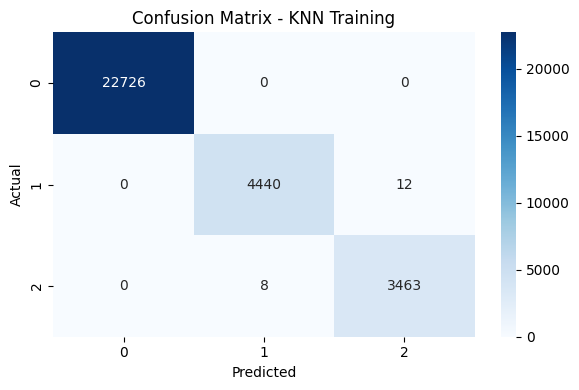

In [11]:
evaluate_model("KNN Training", knn,X_train, y_train, evaluation_results)

Berdasarkan hasil evaluasi data training, algoritma ini menghasilkan akurasi yang sangat tinggi yaitu 99,93%. Nilai precision, recall, dan F1-score juga sangat baik, masing-masing sebesar 0,9982, 0,9983, dan 0,9983. Confusion matrix menunjukkan bahwa sebagian besar prediksi KNN sangat tepat, terutama pada kelas 0 yang diprediksi sempurna tanpa kesalahan. Namun, terdapat sedikit kesalahan klasifikasi di kelas 1 (sebanyak 12 data salah diklasifikasikan ke kelas 2) dan kelas 2 (sebanyak 8 data salah diklasifikasikan ke kelas 1). Ini menunjukkan bahwa meskipun performanya sangat tinggi, KNN masih memiliki kelemahan dalam membedakan data yang sangat mirip antar kelas. Secara keseluruhan, KNN sangat efektif pada data ini, tetapi performanya bisa menurun jika digunakan pada dataset yang lebih besar dan tidak seimbang.

#####Random Forest Training

Model: Random Forest Training
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


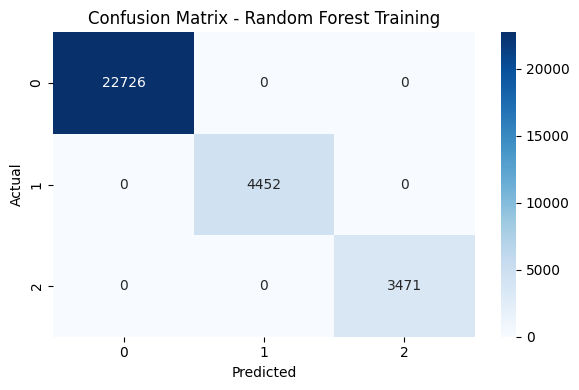

In [12]:
evaluate_model("Random Forest Training", rf,X_train, y_train, evaluation_results)

Berdasarkan hasil pelatihan model, Random Forest menghasilkan akurasi sempurna yaitu 100%, dengan precision, recall, dan F1-score masing-masing juga mencapai 1.000. Ini berarti model berhasil mengklasifikasikan seluruh data training dengan tepat tanpa kesalahan sedikit pun. Confusion matrix menunjukkan bahwa seluruh data dari kelas 0, 1, dan 2 diprediksi dengan benar tanpa ada satu pun data yang salah klasifikasi. Performa sempurna ini menunjukkan bahwa model sangat memahami pola dalam data training. Namun, hasil yang terlalu sempurna seperti ini perlu diwaspadai karena bisa jadi merupakan tanda overfitting, di mana model terlalu "menghafal" data dan berpotensi gagal pada data baru. Meskipun demikian, Random Forest memiliki keunggulan dalam menangani data dengan banyak fitur dan kompleksitas tinggi. Secara keseluruhan, Random Forest sangat kuat dan efektif, tetapi perlu diuji lebih lanjut pada data uji (testing) untuk memastikan generalisasi model.

#####Evaluasi Model Testing 

######KNN Testing 

Model: KNN Testing
Accuracy: 0.9983
Precision: 0.9955
Recall: 0.9954
F1-Score: 0.9955


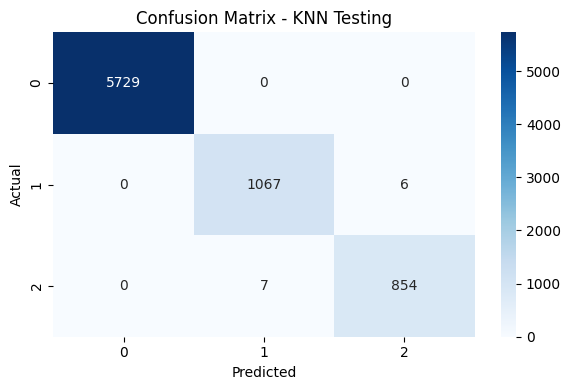

In [13]:
evaluate_model("KNN Testing", knn, X_test, y_test, evaluation_results)

**Analisis KNN Testing**



Berdasarkan hasil pengujian pada data testing, KNN menghasilkan akurasi sebesar 99,83%, menunjukkan performa yang sangat baik. Nilai precision (99,55%), recall (99,54%), dan F1-score (99,55%) menandakan bahwa model sangat akurat dalam mengklasifikasikan tiap kelas. Pada confusion matrix, terlihat bahwa hanya terdapat kesalahan kecil: 6 data dari kelas 1 diklasifikasikan sebagai kelas 2, dan 7 data dari kelas 2 salah diklasifikasikan sebagai kelas 1. Sementara itu, kelas 0 berhasil diklasifikasikan seluruhnya dengan benar sebanyak 5.729 data. Ini menunjukkan bahwa meskipun KNN sedikit salah dalam membedakan antara kelas 1 dan kelas 2, model tetap konsisten dalam menangani data secara keseluruhan. Hasil ini mencerminkan kemampuan KNN yang cukup baik, terutama untuk data yang distribusinya cukup bersih.

#####Random Forest Testing

Model: Random Forest Testing
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


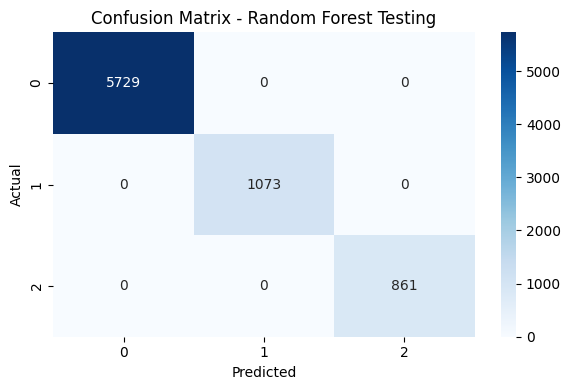

In [14]:
evaluate_model("Random Forest Testing",rf, X_test, y_test, evaluation_results)

**Analisis Random Forest Testing**



Berdasarkan hasil pengujian pada data testing menunjukkan bahwa model ini mencapai akurasi sempurna (100%) pada data testing, yang berarti tidak ada kesalahan klasifikasi sama sekali. Metrik lainnya, yaitu precision, recall, dan F1-score, juga bernilai 1.000, menunjukkan konsistensi tinggi dalam klasifikasi tiap kelas. Pada confusion matrix, setiap nilai aktual diklasifikasikan dengan benar tanpa adanya kesalahan; kelas 0 (5.729 data), kelas 1 (1.073 data), dan kelas 2 (861 data) seluruhnya diprediksi dengan tepat. Ini mengindikasikan bahwa model mampu menangani kompleksitas antar kelas dengan sangat efektif. Akurasi tinggi ini menunjukkan kelebihan Random Forest dalam menangani data berdimensi tinggi dan menghindari overfitting dengan menggunakan voting antar pohon. Selain itu, stabilitas model juga sangat baik karena mampu meminimalkan error bahkan pada data testing. Dengan performa sebaik ini, Random Forest terbukti menjadi model yang sangat andal untuk klasifikasi dengan ketepatan tinggi.

**Analisis Perbandingan KNN vs Random Forest**



Berdasarkan hasil analisis perbandingan model KNN dan Random Forest sama-sama digunakan untuk mengklasifikasikan data pada tahap pengujian (testing). Model Random Forest menunjukkan performa terbaik dengan akurasi, precision, recall, dan f1-score yang semuanya mencapai 100%, artinya tidak ada kesalahan klasifikasi. Sementara itu, model KNN juga menunjukkan hasil yang sangat baik dengan akurasi 99,83%, precision dan recall sebesar 99,55%. Namun, model KNN masih melakukan kesalahan kecil, yaitu salah mengklasifikasikan beberapa data pada kelas 1 dan kelas 2. Confusion matrix KNN menunjukkan ada 6 data kelas 1 yang diklasifikasikan sebagai kelas 2 dan 7 data kelas 2 yang diklasifikasikan sebagai kelas 1. Kesalahan ini bisa terjadi karena KNN lebih sensitif terhadap kemiripan data antar kelas. Sebaliknya, Random Forest lebih stabil karena menggunakan banyak decision tree yang mampu menangkap pola data secara kompleks. Dengan demikian, Random Forest merupakan model yang paling unggul dan dapat diandalkan pada data ini.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik
Berikut adalah rekomendasi tahapannya.


####Tuning KNN

In [15]:
base_knn = KNeighborsClassifier()
# Parameter grid untuk KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 untuk manhattan_distance, p=2 untuk euclidean_distance
}

# Inisialisasi GridSearchCV untuk KNN
knn_random_search = RandomizedSearchCV(
    estimator=base_knn,
    param_distributions=knn_param_grid,
    n_iter=20,  # Jumlah kombinasi acak yang dicoba
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model KNN dengan pencarian parameter
knn_random_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Parameter terbaik untuk KNN:", knn_random_search.best_params_)
print(f"Skor cross-validation terbaik: {knn_random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Parameter terbaik untuk KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'algorithm': 'ball_tree'}
Skor cross-validation terbaik: 0.9989


#####Tuning Random Forest

In [16]:
base_rf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV untuk Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rf_random_search.best_params_}")
print(f"Best cross-validation score: {rf_random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 171}
Best cross-validation score: 1.0000


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

#### Evaluasi Tuning KNN

Model: KNN after tuning
Accuracy: 0.9988
Precision: 0.9968
Recall: 0.9969
F1-Score: 0.9969


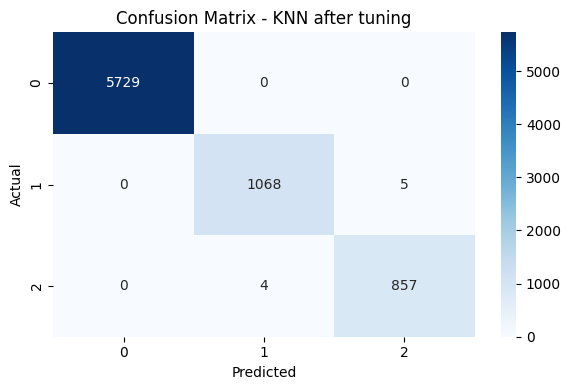

In [17]:
best_knn = knn_random_search.best_estimator_
evaluate_model("KNN after tuning",  best_knn, X_test, y_test, evaluation_results)

#### Evaluasi Tuning Random Forest

Model: Random Forest after tuning
Accuracy: 0.9999
Precision: 0.9997
Recall: 0.9996
F1-Score: 0.9997


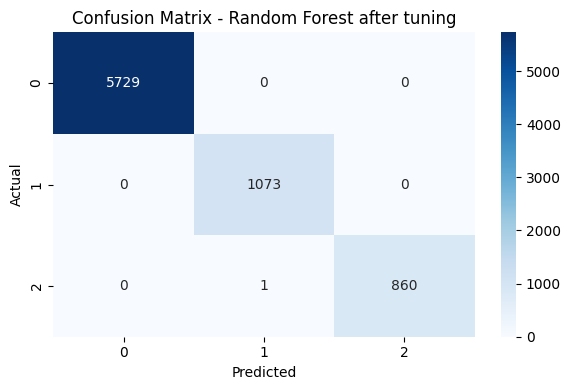

In [18]:
best_rf = rf_random_search.best_estimator_
evaluate_model("Random Forest after tuning", best_rf, X_test, y_test, evaluation_results)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [19]:
results_df = pd.DataFrame(evaluation_results)
print("Tabel Perbandingan Evaluasi Model:")
results_df

Tabel Perbandingan Evaluasi Model:


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN Training,0.999347,0.998249,0.998333,0.998291
1,Random Forest Training,1.000000,1.000000,1.000000,1.000000
2,KNN Testing,0.998304,0.995502,0.995426,0.995464
3,Random Forest Testing,1.000000,1.000000,1.000000,1.000000
4,KNN after tuning,0.998826,0.996823,0.996898,0.996860
5,Random Forest after tuning,0.999870,0.999690,0.999613,0.999651


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

####**1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**
Berdasarkan hasil evaluasi yang ditampilkan, tuning memberikan dampak berbeda pada masing-masing model:
- **KNN** menunjukkan peningkatan kinerja setelah tuning, dengan Accuracy naik dari 0.998304 menjadi 0.998826, Precision meningkat dari 0.995502 ke 0.996823, Recall dari 0.995426 ke 0.996898, dan F1-Score dari 0.995464 ke 0.996860.
- **Random Forest** justru mengalami sedikit penurunan performa setelah tuning, di mana Accuracy turun dari 1.0 ke 0.999870, Precision dari 1.0 ke 0.999690, Recall dari 1.0 ke 0.999613, dan F1-Score dari 1.0 ke 0.999651.

Ini menunjukkan bahwa tuning pada KNN cukup efektif untuk meningkatkan performa meskipun dalam skala kecil, sementara pada Random Forest, tuning tampaknya mengurangi overfitting dan membuat model sedikit lebih general namun tetap sangat akurat. Tuning tetap penting karena dapat berdampak pada efisiensi model dan kemampuannya untuk menghadapi data baru.


####**2. Identifikasi Kelemahan Model**
**a. Tidak Ada Indikasi Precision atau Recall Rendah**  
Seluruh metrik evaluasi (Precision, Recall, F1-Score) untuk kedua model menunjukkan angka di atas 0.99, baik sebelum maupun sesudah tuning. Artinya, kedua model sangat mampu mengklasifikasikan data secara tepat dan sensitif tanpa menghasilkan kesalahan klasifikasi yang signifikan.

**b. Indikasi Potensi Overfitting**  
Model Random Forest menunjukkan metrik sempurna (nilai 1.0) pada data training dan testing sebelum tuning, yang merupakan tanda kemungkinan overfitting. Setelah tuning, nilai sedikit menurun, yang menunjukkan adanya perbaikan dalam generalisasi model. Sebaliknya, KNN menunjukkan hasil evaluasi yang hampir seimbang antara data training dan testing, serta sedikit peningkatan setelah tuning, menandakan bahwa model ini relatif lebih stabil dan tidak mengalami overfitting secara ekstrem.

###**3. Rekomendasi Tindakan Lanjutan**
- **Validasi Silang (Cross-Validation):**
Untuk memastikan tidak terjadi overfitting, lakukan validasi silang seperti k-fold cross-validation, agar performa model diuji pada berbagai subset data dan tidak hanya berdasarkan satu pembagian train-test saja.

- **Evaluasi pada Data Nyata atau Data Baru:**
Cobalah model ini pada data real-world atau dataset yang belum pernah dilihat sebelumnya untuk menilai kemampuan generalisasi secara aktual.

- **Pertimbangkan Pengumpulan Data Tambahan:**
Jika jumlah data saat ini tergolong kecil atau terlalu mudah dipelajari oleh model, pengumpulan data tambahan dapat membantu menciptakan tantangan lebih kompleks agar model lebih realistis dan akurat secara general.

- **Uji dengan Algoritma Lain (Optional):**
mencoba pendekatan dengan algoritma lain seperti XGBoost, SVM, atau Neural Network untuk melihat apakah hasil masih tetap konsisten sempurna. Ini juga penting untuk menguji robustness dan diversitas model.



